Here I'll try to find the best thresholds for purchase/ sale in a deterministic policy. Again, the agent either buys the maximum number of shares or sells them all.

In [1]:
# Read the data

inFile = open("sp500.txt", 'r')

List = []
for line in inFile:
    List.append(line.replace(',', '.'))
inFile.close()

ListNum1 = []

for ind in range(len(List)):
    sss = List[ind]
    ListNum1.append(float(sss))
ListNum = ListNum1[::-1]
price = ListNum[253:]

In [2]:
# Get medians

inFile = open("median.txt", 'r')

List = []
for line in inFile:
    List.append(line.replace(',', '.'))
inFile.close()

median = []
for ind in range(len(List)):
    sss = List[ind]
    median.append(float(sss))

In [3]:
# Get 1st quartiles

inFile = open("quartile1st.txt", 'r')

List = []
for line in inFile:
    List.append(line.replace(',', '.'))
inFile.close()

qu1 = []
for ind in range(len(List)):
    sss = List[ind]
    qu1.append(float(sss))

In [4]:
# Get 3rd quartiles

inFile = open("quartile3rd.txt", 'r')

List = []
for line in inFile:
    List.append(line.replace(',', '.'))
inFile.close()

qu3 = []
for ind in range(len(List)):
    sss = List[ind]
    qu3.append(float(sss))

In [5]:
import random

In [6]:
# for a 2 year episode without taking into account the opportunity cost of the capital:

def runEpisode(ind, k1, k2, price=price, median=median, qu1=qu1, qu3=qu3):
    cash = 10000
    flag = False
    nshares = 0
    fee = 9.99
    nmax = 507
    
    for i in range(ind, (ind+nmax-1)):
        
        if price[i] < median[i] - k1*(median[i] - qu1[i]) and flag == False:
            # Buy!
            nshares = ((cash-fee)/price[i])//1
            cash = cash - nshares*price[i] - fee
            if nshares:
                flag = True
                    
        elif price[i] > median[i] + k2*(qu3[i]-median[i]) and flag == True:
            # Sell!                
            cash = cash + nshares*price[i] - fee
            nshares = 0
            flag = False
                
    # the final day of the episode:
    if nshares:
        cash = cash + nshares*price[ind+nmax-1] - fee
    
    return cash - 10000

In [7]:
ind = 1001

k1 = 1
k2 = 1

print (runEpisode(ind, k1, k2))

295.8600000000006


In [8]:
import numpy as np

In [9]:
k1 = 1
k2 = 1
gain = []

for ind in random.sample(range(3650), 1600):
    gain.append(runEpisode(ind, k1, k2))
    
g = np.array(gain)
print (np.mean(g), np.std(g))

199.37611875000073 1717.3981139256484


In [10]:
k1 = 1
k2 = 1

av_gain = []
for epoch in range(100):
    gain = []
    for ind in random.sample(range(3650), 1600):
        gain.append(runEpisode(ind, k1, k2))
    g = np.array(gain)
    av_gain.append(np.mean(g))
    
av = np.array(av_gain)
print (np.mean(av), np.std(av))

240.62624431250075 29.559469412416103


In [11]:
k1 = 1.1
k2 = 1

av_gain = []
for epoch in range(100):
    gain = []
    for ind in random.sample(range(3650), 1600):
        gain.append(runEpisode(ind, k1, k2))
    g = np.array(gain)
    av_gain.append(np.mean(g))
    
av = np.array(av_gain)
print (np.mean(av), np.std(av))

222.5947011250006 32.50291657683997


In [12]:
k1 = 1
k2 = 1.1

av_gain = []
for epoch in range(100):
    gain = []
    for ind in random.sample(range(3650), 1600):
        gain.append(runEpisode(ind, k1, k2))
    g = np.array(gain)
    av_gain.append(np.mean(g))
    
av = np.array(av_gain)
print (np.mean(av), np.std(av))

114.45989212500089 32.35478184050776


In [13]:
k1 = 1.1
k2 = 1.1

av_gain = []
for epoch in range(100):
    gain = []
    for ind in random.sample(range(3650), 1600):
        gain.append(runEpisode(ind, k1, k2))
    g = np.array(gain)
    av_gain.append(np.mean(g))
    
av = np.array(av_gain)
print (np.mean(av), np.std(av))

76.32991687500069 33.16731732490715


In [14]:
k1 = 1.5
k2 = 1.5

av_gain = []
for epoch in range(100):
    gain = []
    for ind in random.sample(range(3650), 1600):
        gain.append(runEpisode(ind, k1, k2))
    g = np.array(gain)
    av_gain.append(np.mean(g))
    
av = np.array(av_gain)
print (np.mean(av), np.std(av))

54.4893673750003 35.703456583257925


In [15]:
k1 = 0.9
k2 = 1

av_gain = []
for epoch in range(100):
    gain = []
    for ind in random.sample(range(3650), 1600):
        gain.append(runEpisode(ind, k1, k2))
    g = np.array(gain)
    av_gain.append(np.mean(g))
    
av = np.array(av_gain)
print (np.mean(av), np.std(av))

262.9738786250007 36.772721372511164


In [16]:
k1 = 1
k2 = 0.9

av_gain = []
for epoch in range(100):
    gain = []
    for ind in random.sample(range(3650), 1600):
        gain.append(runEpisode(ind, k1, k2))
    g = np.array(gain)
    av_gain.append(np.mean(g))
    
av = np.array(av_gain)
print (np.mean(av), np.std(av))

211.7195468750008 31.50559164138306


In [17]:
k1 = 0.9
k2 = 0.9

av_gain = []
for epoch in range(100):
    gain = []
    for ind in random.sample(range(3650), 1600):
        gain.append(runEpisode(ind, k1, k2))
    g = np.array(gain)
    av_gain.append(np.mean(g))
    
av = np.array(av_gain)
print (np.mean(av), np.std(av))

212.58927181250058 29.88602707875789


In [18]:
k1 = 0.8
k2 = 1

av_gain = []
for epoch in range(100):
    gain = []
    for ind in random.sample(range(3650), 1600):
        gain.append(runEpisode(ind, k1, k2))
    g = np.array(gain)
    av_gain.append(np.mean(g))
    
av = np.array(av_gain)
print (np.mean(av), np.std(av))

250.3551746875008 30.91077198988485


In [19]:
k1 = 0.7
k2 = 1

av_gain = []
for epoch in range(100):
    gain = []
    for ind in random.sample(range(3650), 1600):
        gain.append(runEpisode(ind, k1, k2))
    g = np.array(gain)
    av_gain.append(np.mean(g))
    
av = np.array(av_gain)
print (np.mean(av), np.std(av))

221.76876937500052 30.886040911685


In [20]:
k1 = 0.6
k2 = 1

av_gain = []
for epoch in range(100):
    gain = []
    for ind in random.sample(range(3650), 1600):
        gain.append(runEpisode(ind, k1, k2))
    g = np.array(gain)
    av_gain.append(np.mean(g))
    
av = np.array(av_gain)
print (np.mean(av), np.std(av))

228.05523325000067 27.92909675229833


In [21]:
k1 = 0.85
k2 = 1

av_gain = []
for epoch in range(100):
    gain = []
    for ind in random.sample(range(3650), 1600):
        gain.append(runEpisode(ind, k1, k2))
    g = np.array(gain)
    av_gain.append(np.mean(g))
    
av = np.array(av_gain)
print (np.mean(av), np.std(av))

260.2636867500007 30.638222419847924


In [22]:
k1 = 0.9
k2 = 1

av_gain = []
for epoch in range(100):
    gain = []
    for ind in random.sample(range(3650), 1600):
        gain.append(runEpisode(ind, k1, k2))
    g = np.array(gain)
    av_gain.append(np.mean(g))
    
av = np.array(av_gain)
print (np.mean(av), np.std(av))

259.89340425000074 33.315623305818505


In [23]:
k1 = 0.9
k2 = 1.05

av_gain = []
for epoch in range(100):
    gain = []
    for ind in random.sample(range(3650), 1600):
        gain.append(runEpisode(ind, k1, k2))
    g = np.array(gain)
    av_gain.append(np.mean(g))
    
av = np.array(av_gain)
print (np.mean(av), np.std(av))

303.219439812501 35.422084216620235


In [24]:
k1 = 0.95
k2 = 1.05

av_gain = []
for epoch in range(100):
    gain = []
    for ind in random.sample(range(3650), 1600):
        gain.append(runEpisode(ind, k1, k2))
    g = np.array(gain)
    av_gain.append(np.mean(g))
    
av = np.array(av_gain)
print (np.mean(av), np.std(av))

327.2589635000011 31.354520507689145


In [25]:
k1 = 0.95
k2 = 1.1

av_gain = []
for epoch in range(100):
    gain = []
    for ind in random.sample(range(3650), 1600):
        gain.append(runEpisode(ind, k1, k2))
    g = np.array(gain)
    av_gain.append(np.mean(g))
    
av = np.array(av_gain)
print (np.mean(av), np.std(av))

176.53380331250105 35.17052494996986


In [26]:
k1 = 0.95
k2 = 1.1

av_gain = []
for epoch in range(100):
    gain = []
    for ind in random.sample(range(3650), 1600):
        gain.append(runEpisode(ind, k1, k2))
    g = np.array(gain)
    av_gain.append(np.mean(g))
    
av = np.array(av_gain)
print (np.mean(av), np.std(av))

182.60528831250107 33.70535053919742


In [27]:
k1 = 0.95
k2 = 1.15

av_gain = []
for epoch in range(100):
    gain = []
    for ind in random.sample(range(3650), 1600):
        gain.append(runEpisode(ind, k1, k2))
    g = np.array(gain)
    av_gain.append(np.mean(g))
    
av = np.array(av_gain)
print (np.mean(av), np.std(av))

181.62462962500118 31.583473194273168


In [28]:
k1 = 0.95
k2 = 1.05

av_gain = []
for epoch in range(100):
    gain = []
    for ind in random.sample(range(3650), 1600):
        gain.append(runEpisode(ind, k1, k2))
    g = np.array(gain)
    av_gain.append(np.mean(g))
    
av = np.array(av_gain)
print (np.mean(av), np.std(av))

326.92035481250105 28.397158325046917


In [29]:
k1 = 0.95
k2 = 1.05

av_gain = []
for epoch in range(1000):
    gain = []
    for ind in random.sample(range(3650), 1600):
        gain.append(runEpisode(ind, k1, k2))
    g = np.array(gain)
    av_gain.append(np.mean(g))
    
av = np.array(av_gain)
print (np.mean(av), np.std(av))

333.024613375001 32.707048903031485


OK. The total return is slightly over 300 dollars on 10k investment for 2 years. Very nice, but where is the stock market premium over the safe investments in Treasury notes?

Let's see what's the average return for the test set:

In [30]:
k1 = 0.95
k2 = 1.05

test_gain = []

for i in range(3651, 3751):
    test_gain.append(runEpisode(i, k1, k2))

In [31]:
tg = np.array(test_gain)
print (np.mean(tg), np.std(tg))

486.46020000000055 409.9308557622373


Interesting! almost 500 dollars on 10 k investment for two years...

(array([26.,  7., 24.,  7.,  2.,  8., 11.,  7.,  7.,  1.]),
 array([   0.   ,  140.832,  281.664,  422.496,  563.328,  704.16 ,
         844.992,  985.824, 1126.656, 1267.488, 1408.32 ]),
 <a list of 10 Patch objects>)

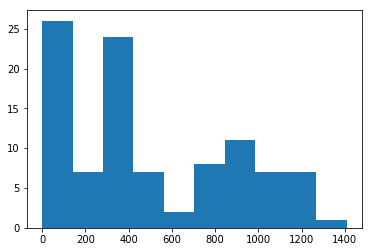

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(test_gain)